In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import OneHotEncoder 
en = OneHotEncoder()
en.fit([[0], [1]]) # Tumor(0), Normal(1)

OneHotEncoder()

In [3]:
import os
from PIL import Image
data = [] # each element is a image (as numpy array)
path = [] # path of each image
result = [] 
# Considering the .jpg files as data
for root, dirs, files in os.walk(r'./input/yes'):
    for file in files:
        if '.jpg' in file:
            path.append(os.path.join(root, file))

for i in path:
    img = Image.open(i)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(en.transform([[0]]).toarray())

In [4]:
path = []
for root, dirs, files in os.walk(r'./input/no'):
    for file in files:
        if '.jpg' in file:
            path.append(os.path.join(root, file))

for i in path:
    img = Image.open(i)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(en.transform([[1]]).toarray())

In [5]:
# Converting data to numpy array

data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
# Converting result to numpy array
result = np.array(result)
result = result.reshape(139,2)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data, result, test_size=0.2)

In [8]:
# Building the model
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (X_test, y_test))

Epoch 1/30
3/3 [==============================] - 6s 2s/step - loss: 50.4983 - val_loss: 108.7217
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 30.8808 - val_loss: 71.7456
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 12.9740 - val_loss: 25.8103
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 6.9610 - val_loss: 24.2844
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 4.1375 - val_loss: 15.4054
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 2.4454 - val_loss: 8.5403
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 1.5203 - val_loss: 6.5658
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 0.7345 - val_loss: 9.2047
Epoch 9/30
3/3 [==============================] - 4s 1s/step - loss: 0.9305 - val_loss: 10.9862
Epoch 10/30
3/3 [==============================] - 4s 1s/step - loss: 1.0116 - val_loss: 8.9878
Epoch 11/30
3/3 [======================

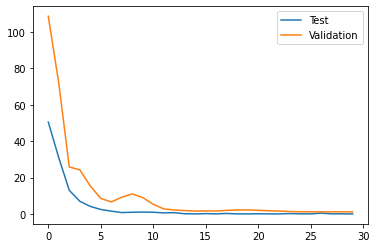

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

Tumor


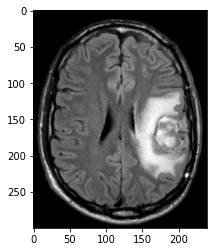

In [12]:
def fun(a):
    if a==0:
        return 'Tumor'
    else:
        return 'Not a tumor'


from matplotlib.pyplot import imshow
img1 = Image.open(r"./input/yes/Y20.jpg")
img2 = np.array(img1.resize((128,128)))
img2 = img2.reshape(1,128,128,3)
res = model.predict_on_batch(img2)
temp = np.where(res == np.amax(res))[1][0]
imshow(img1)
print(fun(temp))